# Programa Nº 1:

-----

## WordCloud Exploration

1. WordCloud I<br />
    1.1. Preprocesamiento y Procesamiento<br />
        - Preprocesamiento: Feature extracción, ajuste del content en su conjunto, tokenización<br />
        - Procesamiento: Implementación de filtros para la limpieza y filtros para la selección de muestras<br />
    1.2. Tratamiento y Generación de WordCloud<br />
        - Tratamiento: Aplicación de stop_words por medio de modelo IA (spacy)<br />
        - Generación WC: Uno para la feature "content_wc" y otro para la feature "token_wc"<br />
    1.3 Agregación:<br />
        - Agregación en el sentido de la estructura de datos, el programa recibe un fichero con extensión<br />
            ".csv" y devuelve una lista Python, el primer elemento es "dataframes" y el segundo "wordcloud_storage"<br />
        - dataframes: Es un diccionario Python, en su interior hay 1 pandas.DataFrame por cada filtro booleano<br />
            se haya implementado. Por default no hay filtros booleanos implementados, por lo tanto el diccionario<br />
            tendría la siguiente forma ```{'csv_filename': [pd.DataFrame(...)]}``` con todo el contenido del batch.<br />
        - wordcloud_storage: Es un diccionario Python, en su interior posee las instancias de clase del objeto tipo<br />
            WordCloud de la librería wordcloud. La App utiliza dos features, "content_wc", y "token_wc", por lo tanto,<br />
            siguiendo con el ejemplo de no aplicar ningún filtro booleano, el segundo elemento de la lista de agregación<br />
            sería así ```{'csv_filename': [ [WC_content, WC_token] ] }```.<br />
        - El output del set de aplicaciones resulta entonces, ```result = [{...}, {...}]``` - el primer diccionario es<br />
            dataframes, y el segundo wordcloud_storage<br />
    1.4 Outputs:<br />
        - El programa fue pensado para obtener un primer approach a lo que el contenido refleja en su conjunto<br />
        - Optimizar la extracción de muestras por medio de multi-hilos, durante el proceso de stop_words<br />
        - wordcloud.WordCloud permite obtener imágenes, texto, y campos vectoriales por medio de la implementación<br />
            de sus métodos internos, to_image(), to_svg(), to_array(), respectivamente.<br />
        - Brindar al usuario flexibilidad en los outputs, por medio de implementación de máscaras, filtros de palabras,<br />
            configuraciónes preseteadas, y demás.<br />
        - Un resplado en .txt de la última configuración utilizada para cada máscara.<br />

2. Clasificación de Sentimiento y Emociones<br />
    2.1 Prepocesamiento y Procesamiento<br />
        - Preprocesamiento: Feature extracción, ajuste del content en su conjunto, tokenización<br />
        - Procesamiento: Time Series adjustment, agregación de variables temporales<br />
    2.2 Transformers:<br />
        - Multiprocesos: Paralelización los modelos de Emociones<br />
        - Sentimiento: 3 modelos M1_I, M1_II, y M1_III<br />
            + M1_I: Optimización por multihilos, sub-batches secuenciales<br />
            + M1_II: Ingesta por Data Streaming mediante Python Generators<br />
            + M1_III: Ingesta por Data Streaming mediante Python Generators<br />
        - Emociones: 2 modelos M2, y M3<br />
            + M2: Ingesta por Data Streaming mediante Python Generators<br />
            + M3: Ingesta por Data Streaming mediante Python Generators<br />
    2.3 Analíticas:<br />
        - Gráficos: Línea de tiempo, Gráficos Radiales, Gráficos de Barras<br />
        - Outputs: Ficheros .csv y .txt con resumen descriptivo<br />

3. WordCloud II:<br />
    3.1 Lectura de clasificaciones<br />
        - Definir filtros booleanos para cada muestra<br />
    3.2 Tratamiento y Generación de WordCloud<br />
        - Tratamiento: Extracción con filtros, implementación de multi-hilos para stop_words<br />
        - Generación WC: Una lista por cada muestra y un objeto por cada feature.<br />
    3.3 Agregación:<br />
    3.4 Outputs<br />


4. Identificación de Tópicos: es otra notebook que creo que se llama Lotto.
            M4: Optimización por multihilos, sub-batches paralelos


In [4]:
filename = "octubre-untitled.csv"

import multiprocessing as mp
from tools.feed import procesar_file_csv
from app.main import data_feed
from app.wordcloud_app import main_df
from app.transformer_models import main_transformers


nombre, archivo = procesar_file_csv(filename)
df = data_feed.main(archivo)
df.name = nombre
dataframes, wc_storage = main_df(df)

if __name__ == "__main__":
    mp.freeze_support()
    print("Hoola Mundoo!")

Tokenizando: 3651it [00:00, 45470.86it/s]
100%|██████████| 1403/1403 [00:07<00:00, 185.82it/s]


Implementando configuración con Máscara: c:\Users\Agustin\Proyectos 2023\Noviembre\sweet_cotton\word_cloud_config\mascaras_png\rectangulo.png
app.word_cloud.output_analysis ended succesfully!
app.word_cloud.WordCloud ended succesfully.
Hoola Mundoo!


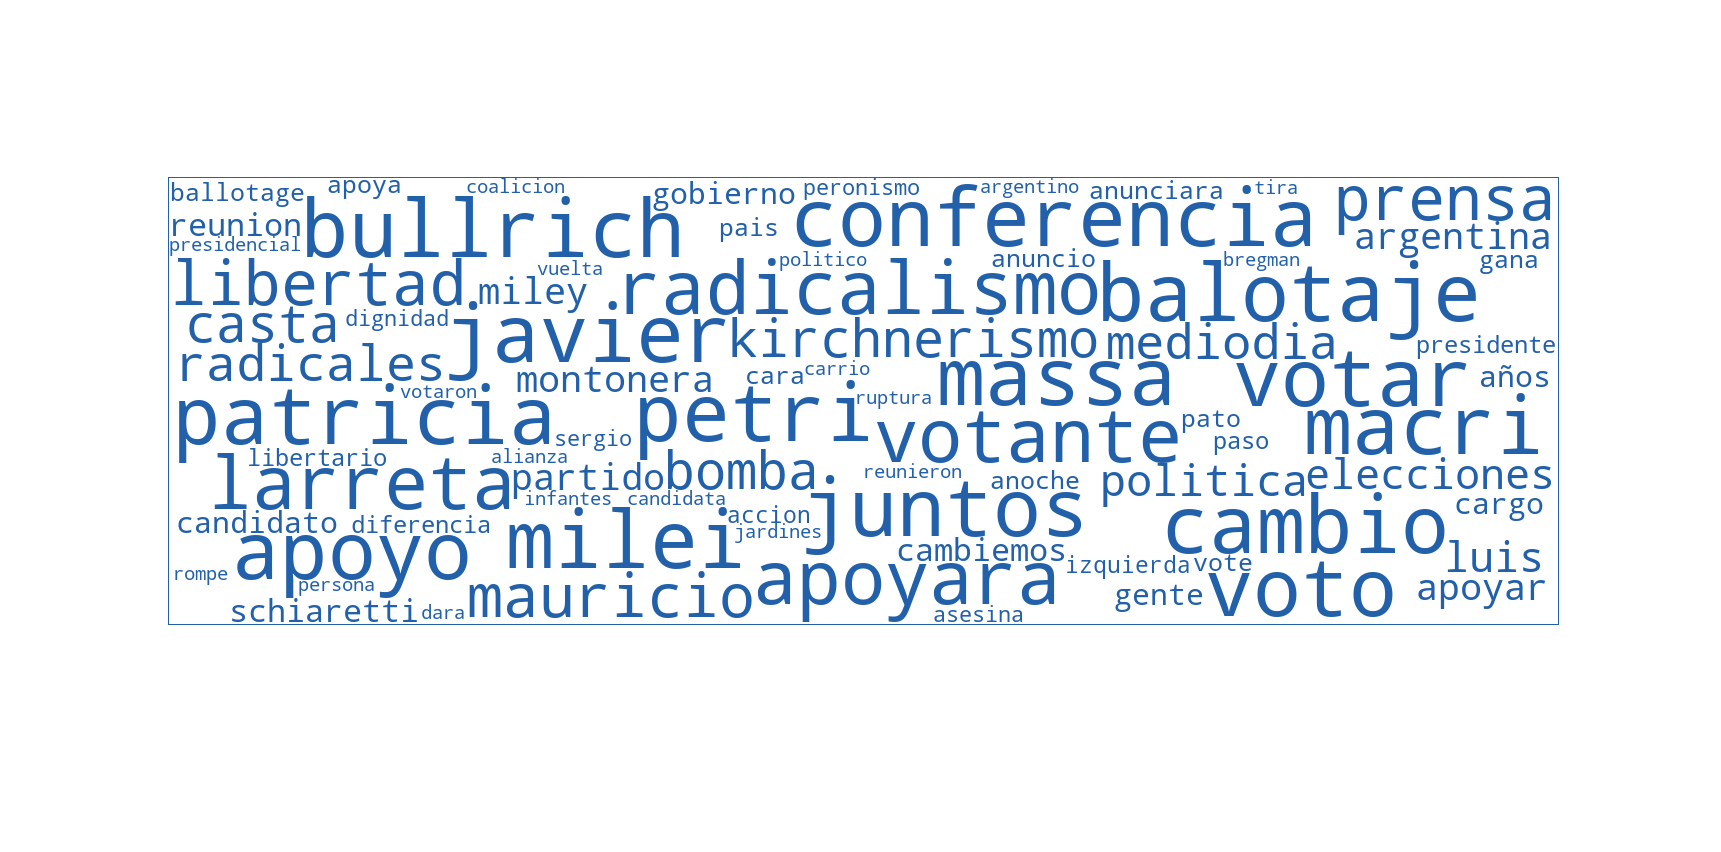

In [8]:
# primera corrida
len(wc_storage)
len(wc_storage[0])
wc_storage[0][0].to_image()

In [4]:
result[0]

,emotions_26_max_label,emotions_26_labels,emotions_26_scores
0,gratitude,"[gratitude, caring, approval, curiosity, admir...","[0.09215246140956879, 0.08585971593856812, 0.0..."
1,excitement,"[excitement, confusion, realization, approval,...","[0.11606311053037643, 0.07063411921262741, 0.0..."
2,amusement,"[amusement, excitement, curiosity, caring, adm...","[0.07036074250936508, 0.06932064890861511, 0.0..."
3,excitement,"[excitement, caring, gratitude, admiration, ap...","[0.08437985926866531, 0.07542388141155243, 0.0..."
4,caring,"[caring, realization, curiosity, disapproval, ...","[0.06899978220462799, 0.058141060173511505, 0...."
...,...,...,...
295,caring,"[caring, approval, gratitude, excitement, real...","[0.07830172777175903, 0.07413315773010254, 0.0..."
296,caring,"[caring, curiosity, amusement, approval, desir...","[0.06109825149178505, 0.05608627572655678, 0.0..."
297,approval,"[approval, caring, excitement, curiosity, real...","[0.0630531907081604, 0.05965982377529144, 0.05..."
298,excitement,"[excitement, caring, gratitude, admiration, ap...","[0.08437985926866531, 0.07542388141155243, 0.0..."


In [5]:
import pickle

with open("___main___M1.pkl", "rb") as f:
    result = pickle.load(f)

In [7]:
result

,@timestamp,content,sentiment_i,score_sentiment_i
0,"Oct 25, 2023 @ 14:49:00.000",HOY TENEMOS: \n\n- Nuevo evento Halloween (va...,neutral,0.565132
1,"Oct 25, 2023 @ 14:46:00.000",Dedicado a la ovajes políticas de Cambiemos. 😘...,negative,0.934909
2,"Oct 25, 2023 @ 14:43:00.000",@OrwellGeorge @PatoBullrich Daaaaaleee...\n\nS...,neutral,0.694642
3,"Oct 25, 2023 @ 14:32:00.000",Cuando le consultaron por el anuncio de que Pa...,negative,0.865708
4,"Oct 25, 2023 @ 14:30:00.000",#EleccionesArgentina| La exaspirante presidenc...,negative,0.869214
...,...,...,...,...
295,"Oct 25, 2023 @ 13:08:00.000",Sentimos una responsabilidad por la boleta que...,negative,0.699421
296,"Oct 25, 2023 @ 13:08:00.000",Milei y Bullrich se perdonaron.\n\nEs Juntos!\...,positive,0.776587
297,"Oct 25, 2023 @ 13:08:00.000","Bullrich anunció su apoyo a Milei, también dij...",neutral,0.617816
298,"Oct 25, 2023 @ 13:07:00.000",🔵 Patricia Bullrich en conferencia de prensa: ...,neutral,0.640833


In [8]:
import pickle

with open("___main___M1_II.pkl", "rb") as f:
    result = pickle.load(f)
    
result

,sentiment_ii_max_label,sentiment_ii_labels,sentiment_ii_scores
0,Positivo,"[Positivo, Negativo]","[0.8895094394683838, 0.11049050092697144]"
1,Positivo,"[Positivo, Negativo]","[0.9855915307998657, 0.014408485032618046]"
2,Negativo,"[Negativo, Positivo]","[0.995871365070343, 0.00412861630320549]"
3,Negativo,"[Negativo, Positivo]","[0.9701753854751587, 0.029824556782841682]"
4,Positivo,"[Positivo, Negativo]","[0.9503304958343506, 0.049669552594423294]"
...,...,...,...
295,Positivo,"[Positivo, Negativo]","[0.9482978582382202, 0.0517021045088768]"
296,Positivo,"[Positivo, Negativo]","[0.9875746369361877, 0.01242542453110218]"
297,Positivo,"[Positivo, Negativo]","[0.8848809003829956, 0.11511911451816559]"
298,Positivo,"[Positivo, Negativo]","[0.9390977621078491, 0.06090221181511879]"


In [9]:
import pickle

with open("___main___M1_III.pkl", "rb") as f:
    result = pickle.load(f)

result

,sentiment_iii_max_label,sentiment_iii_labels,sentiment_iii_scores
0,positive,"[positive, negative, neutral]","[0.5684913396835327, 0.28079837560653687, 0.15..."
1,negative,"[negative, positive, neutral]","[0.7345429062843323, 0.16407395899295807, 0.10..."
2,negative,"[negative, positive, neutral]","[0.6902536153793335, 0.15762653946876526, 0.15..."
3,negative,"[negative, neutral, positive]","[0.763792872428894, 0.1255170851945877, 0.1106..."
4,positive,"[positive, negative, neutral]","[0.4858470559120178, 0.4229309558868408, 0.091..."
...,...,...,...
295,positive,"[positive, neutral, negative]","[0.4033440053462982, 0.29880136251449585, 0.29..."
296,positive,"[positive, negative, neutral]","[0.7273871302604675, 0.1777203381061554, 0.094..."
297,positive,"[positive, negative, neutral]","[0.5737696290016174, 0.32427525520324707, 0.10..."
298,positive,"[positive, negative, neutral]","[0.583690881729126, 0.29989150166511536, 0.116..."


In [1]:
import pickle
import pandas as pd
import multiprocessing as mp

from tools.feed import procesar_file_csv

import app.main.data_feed as data_feed

from app.main import data_feed
from app.transformer_models import main_transformers

if __name__ == "__main__":
    
    mp.freeze_support()
    
    file_name = "octubre-untitled.csv"
    nombre, archivo = procesar_file_csv(file_name)
    # file_path = os.path.join(project_root, archivo)
        
    df = data_feed.main(archivo)
    print(f'La forma de df es {df.shape}')
    df = df.head(351)
    df.name = nombre
    
    results = main_transformers(df)
    print("Done!")

results;

La forma de df es (3651, 2)
Arrancando predicciones de Sentimiento en paralelo
Arrancando predicciones de emociones en paralelo
Done!


NameError: name 'result' is not defined

In [2]:
results

,@timestamp,content,sentiment_i,score_sentiment_i,sentiment_iii_max_label,sentiment_iii_labels,sentiment_iii_scores,sentiment_ii_max_label,sentiment_ii_labels,sentiment_ii_scores,emotions_26_max_label,emotions_26_labels,emotions_26_scores,emotions_6_max_label,emotions_6_labels,emotions_6_scores
0,"Oct 25, 2023 @ 14:49:00.000",HOY TENEMOS: \n\n- Nuevo evento Halloween (va...,positive,0.820112,positive,"[positive, negative, neutral]","[0.5684913396835327, 0.28079837560653687, 0.15...",Positivo,"[Positivo, Negativo]","[0.8895094394683838, 0.11049050092697144]",excitement,"[excitement, amusement, curiosity, caring, con...","[0.07898403704166412, 0.06418216228485107, 0.0...",joy,"[joy, love, surprise, sadness, fear, anger]","[0.9969273209571838, 0.0009511648677289486, 0...."
1,"Oct 25, 2023 @ 14:46:00.000",Dedicado a la ovajes políticas de Cambiemos. 😘...,neutral,0.486385,negative,"[negative, positive, neutral]","[0.7345429062843323, 0.16407395899295807, 0.10...",Positivo,"[Positivo, Negativo]","[0.9855915307998657, 0.014408485032618046]",confusion,"[confusion, curiosity, caring, approval, desir...","[0.09342984110116959, 0.09127266705036163, 0.0...",joy,"[joy, love, anger, sadness, surprise, fear]","[0.5640258193016052, 0.4174834191799164, 0.007..."
2,"Oct 25, 2023 @ 14:43:00.000",@OrwellGeorge @PatoBullrich Daaaaaleee...\n\nS...,negative,0.908909,negative,"[negative, positive, neutral]","[0.6902536153793335, 0.15762653946876526, 0.15...",Negativo,"[Negativo, Positivo]","[0.995871365070343, 0.00412861630320549]",excitement,"[excitement, confusion, approval, caring, real...","[0.06502652168273926, 0.06076408550143242, 0.0...",anger,"[anger, sadness, joy, love, surprise, fear]","[0.7943344712257385, 0.15552885830402374, 0.03..."
3,"Oct 25, 2023 @ 14:32:00.000",Cuando le consultaron por el anuncio de que Pa...,neutral,0.580925,negative,"[negative, neutral, positive]","[0.763792872428894, 0.1255170851945877, 0.1106...",Negativo,"[Negativo, Positivo]","[0.9701753854751587, 0.029824556782841682]",caring,"[caring, approval, neutral, realization, love,...","[0.06469469517469406, 0.05835047736763954, 0.0...",joy,"[joy, love, surprise, anger, sadness, fear]","[0.9715357422828674, 0.012884345836937428, 0.0..."
4,"Oct 25, 2023 @ 14:30:00.000",#EleccionesArgentina| La exaspirante presidenc...,negative,0.852356,positive,"[positive, negative, neutral]","[0.4858470559120178, 0.4229309558868408, 0.091...",Positivo,"[Positivo, Negativo]","[0.9503304958343506, 0.049669552594423294]",caring,"[caring, curiosity, gratitude, approval, pride...","[0.0764968991279602, 0.06599389761686325, 0.06...",joy,"[joy, anger, surprise, sadness, fear, love]","[0.9377127885818481, 0.029182307422161102, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"Oct 25, 2023 @ 13:04:00.000","@JMilei @SergioMassa 🎙️Bullrich: ""Anoche tuve ...",positive,0.658159,positive,"[positive, negative, neutral]","[0.5291856527328491, 0.36695966124534607, 0.10...",Positivo,"[Positivo, Negativo]","[0.9520436525344849, 0.04795629531145096]",caring,"[caring, approval, realization, excitement, cu...","[0.0743744820356369, 0.06393954902887344, 0.05...",joy,"[joy, sadness, love, anger, surprise, fear]","[0.8591764569282532, 0.0955425500869751, 0.036..."
344,"Oct 25, 2023 @ 13:04:00.000",@luisnovaresio Luis te re banco…pero en esta n...,neutral,0.363884,negative,"[negative, positive, neutral]","[0.6349892020225525, 0.19514837861061096, 0.16...",Positivo,"[Positivo, Negativo]","[0.9795727133750916, 0.020427333191037178]",neutral,"[neutral, caring, excitement, approval, confus...","[0.05988724157214165, 0.05805644765496254, 0.0...",joy,"[joy, anger, sadness, love, fear, surprise]","[0.6193297505378723, 0.21379287540912628, 0.13..."
345,"Oct 25, 2023 @ 13:04:00.000",RT #AHORA 🇦🇷 #Elecciones2023 Patricia Bullrich...,positive,0.820112,positive,"[positive, negative, neutral]","[0.8558344841003418, 0.08874065428972244, 0.05...",Positivo,"[Positivo, Negativo]","[0.99477708339

In [30]:
import pandas as pd
# resultados = []

# # Iterar a través de cada sublista en lista
# for sublista in result:
#     # Concatenar DataFrames dentro de la sublista a lo largo de las columnas
#     resultado_sublista = pd.concat(sublista, axis=1)
    
#     # Agregar el resultado a la lista de resultados
#     resultados.append(resultado_sublista)
    
    





In [32]:
# len(resultados)


,@timestamp,content,sentiment_i,score_sentiment_i,sentiment_iii_max_label,sentiment_iii_labels,sentiment_iii_scores,sentiment_ii_max_label,sentiment_ii_labels,sentiment_ii_scores,emotions_26_max_label,emotions_26_labels,emotions_26_scores,emotions_6_max_label,emotions_6_labels,emotions_6_scores
0,"Oct 25, 2023 @ 14:49:00.000",HOY TENEMOS: \n\n- Nuevo evento Halloween (va...,positive,0.820112,positive,"[positive, negative, neutral]","[0.5684913396835327, 0.28079837560653687, 0.15...",Positivo,"[Positivo, Negativo]","[0.8895094394683838, 0.11049050092697144]",excitement,"[excitement, amusement, curiosity, caring, con...","[0.07898403704166412, 0.06418216228485107, 0.0...",joy,"[joy, love, surprise, sadness, fear, anger]","[0.9969273209571838, 0.0009511648677289486, 0...."
1,"Oct 25, 2023 @ 14:46:00.000",Dedicado a la ovajes políticas de Cambiemos. 😘...,neutral,0.486385,negative,"[negative, positive, neutral]","[0.7345429062843323, 0.16407395899295807, 0.10...",Positivo,"[Positivo, Negativo]","[0.9855915307998657, 0.014408485032618046]",confusion,"[confusion, curiosity, caring, approval, desir...","[0.09342984110116959, 0.09127266705036163, 0.0...",joy,"[joy, love, anger, sadness, surprise, fear]","[0.5640258193016052, 0.4174834191799164, 0.007..."
2,"Oct 25, 2023 @ 14:43:00.000",@OrwellGeorge @PatoBullrich Daaaaaleee...\n\nS...,negative,0.908909,negative,"[negative, positive, neutral]","[0.6902536153793335, 0.15762653946876526, 0.15...",Negativo,"[Negativo, Positivo]","[0.995871365070343, 0.00412861630320549]",excitement,"[excitement, confusion, approval, caring, real...","[0.06502652168273926, 0.06076408550143242, 0.0...",anger,"[anger, sadness, joy, love, surprise, fear]","[0.7943344712257385, 0.15552885830402374, 0.03..."
3,"Oct 25, 2023 @ 14:32:00.000",Cuando le consultaron por el anuncio de que Pa...,neutral,0.580925,negative,"[negative, neutral, positive]","[0.763792872428894, 0.1255170851945877, 0.1106...",Negativo,"[Negativo, Positivo]","[0.9701753854751587, 0.029824556782841682]",caring,"[caring, approval, neutral, realization, love,...","[0.06469469517469406, 0.05835047736763954, 0.0...",joy,"[joy, love, surprise, anger, sadness, fear]","[0.9715357422828674, 0.012884345836937428, 0.0..."
4,"Oct 25, 2023 @ 14:30:00.000",#EleccionesArgentina| La exaspirante presidenc...,negative,0.852356,positive,"[positive, negative, neutral]","[0.4858470559120178, 0.4229309558868408, 0.091...",Positivo,"[Positivo, Negativo]","[0.9503304958343506, 0.049669552594423294]",caring,"[caring, curiosity, gratitude, approval, pride...","[0.0764968991279602, 0.06599389761686325, 0.06...",joy,"[joy, anger, surprise, sadness, fear, love]","[0.9377127885818481, 0.029182307422161102, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"Oct 25, 2023 @ 13:04:00.000","@JMilei @SergioMassa 🎙️Bullrich: ""Anoche tuve ...",positive,0.658159,positive,"[positive, negative, neutral]","[0.5291856527328491, 0.36695966124534607, 0.10...",Positivo,"[Positivo, Negativo]","[0.9520436525344849, 0.04795629531145096]",caring,"[caring, approval, realization, excitement, cu...","[0.0743744820356369, 0.06393954902887344, 0.05...",joy,"[joy, sadness, love, anger, surprise, fear]","[0.8591764569282532, 0.0955425500869751, 0.036..."
344,"Oct 25, 2023 @ 13:04:00.000",@luisnovaresio Luis te re banco…pero en esta n...,neutral,0.363884,negative,"[negative, positive, neutral]","[0.6349892020225525, 0.19514837861061096, 0.16...",Positivo,"[Positivo, Negativo]","[0.9795727133750916, 0.020427333191037178]",neutral,"[neutral, caring, excitement, approval, confus...","[0.05988724157214165, 0.05805644765496254, 0.0...",joy,"[joy, anger, sadness, love, fear, surprise]","[0.6193297505378723, 0.21379287540912628, 0.13..."
345,"Oct 25, 2023 @ 13:04:00.000",RT #AHORA 🇦🇷 #Elecciones2023 Patricia Bullrich...,positive,0.820112,positive,"[positive, negative, neutral]","[0.8558344841003418, 0.08874065428972244, 0.05...",Positivo,"[Positivo, Negativo]","[0.99477708339